#Import titanic competitions

In [1]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is 7879-FFB6

 Directory of e:\ICBT\BSc ICBT\2nd sem CI\Titanic

08/31/2023  11:01 PM                 0 ,
09/01/2023  05:40 PM    <DIR>          .
09/01/2023  03:27 PM    <DIR>          ..
08/31/2023  09:09 PM    <DIR>          .vscode
09/01/2023  05:18 PM         7,818,382 model.pkl
09/01/2023  05:38 PM             3,258 predictions1.csv
09/01/2023  12:46 AM    <DIR>          titanic
09/01/2023  05:44 PM            12,520 titanic.ipynb
08/31/2023  09:07 PM            34,877 titanic.zip
               5 File(s)      7,869,037 bytes
               4 Dir(s)  244,955,648,000 bytes free


#Install Lib

In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn


^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



#Import Lib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Read .csv using pandas

In [4]:
titanic_data = pd.read_csv('titanic/train.csv')
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]) :
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

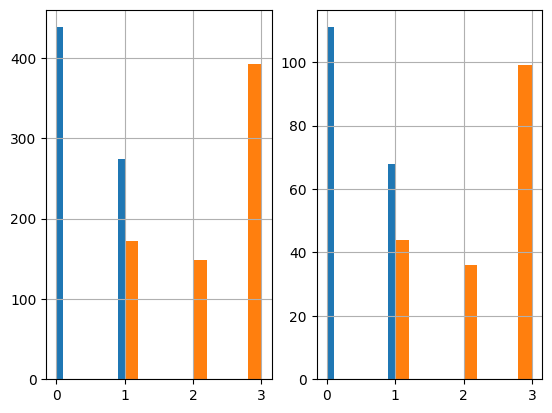

In [7]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [8]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 523 to 547
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          567 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None) :
        return self
    
    def transform(self, X) :
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [10]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin) :
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C","S","Q","N"]


        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)) :
            print(i)
            X[column_names[i]] = matrix.T[i]
            
        return X

In [11]:
class FeatureDropper(BaseEstimator, TransformerMixin) :
    def fit(self, X, y=None):
        return self

    def transform(self, X) :
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [12]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()), 
    ("featureencoder", FeatureEncoder()), 
    ("featuredropper", FeatureDropper() )
])

In [13]:
strat_train_set = pipeline.fit_transform(strat_train_set)

0
1


In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 523 to 547
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [15]:
import seaborn as sns

def visualize_data(feature):
    plt.subplots(figsize = (10,10))
    ax=sns.countplot(x=feature,hue='Survived',data=strat_train_set)
    plt.title("Survived vs Non-Survived by "+feature, fontsize = 25)
    leg=ax.get_legend()
    leg.set_title('Survival')
    legs=leg.texts
    legs[0].set_text('No')
    legs[1].set_text("yes")  
    
#this function is used to print number of Survived passenger by a selective feature
def print_survived_data_by_feature(data,feature):    
    print('\n\nNumber of Survived passenger by '+feature+' :')
    print(data[data['Survived']==1][feature].groupby(strat_train_set[feature]).count())
    print('\n\nNumber of Death passenger by '+feature+' :')
    print(strat_train_set[data['Survived']==0][feature].groupby(data[feature]).count())    

In [18]:
print(strat_train_set['Survived'].value_counts())
survived = "{:.2f}".format(strat_train_set['Survived'].value_counts(normalize=True)[0]*100)

Survived
0    438
1    274
Name: count, dtype: int64




Number of Survived passenger by Pclass :
Pclass
1    109
2     70
3     95
Name: Pclass, dtype: int64


Number of Death passenger by Pclass :
Pclass
1     63
2     78
3    297
Name: Pclass, dtype: int64


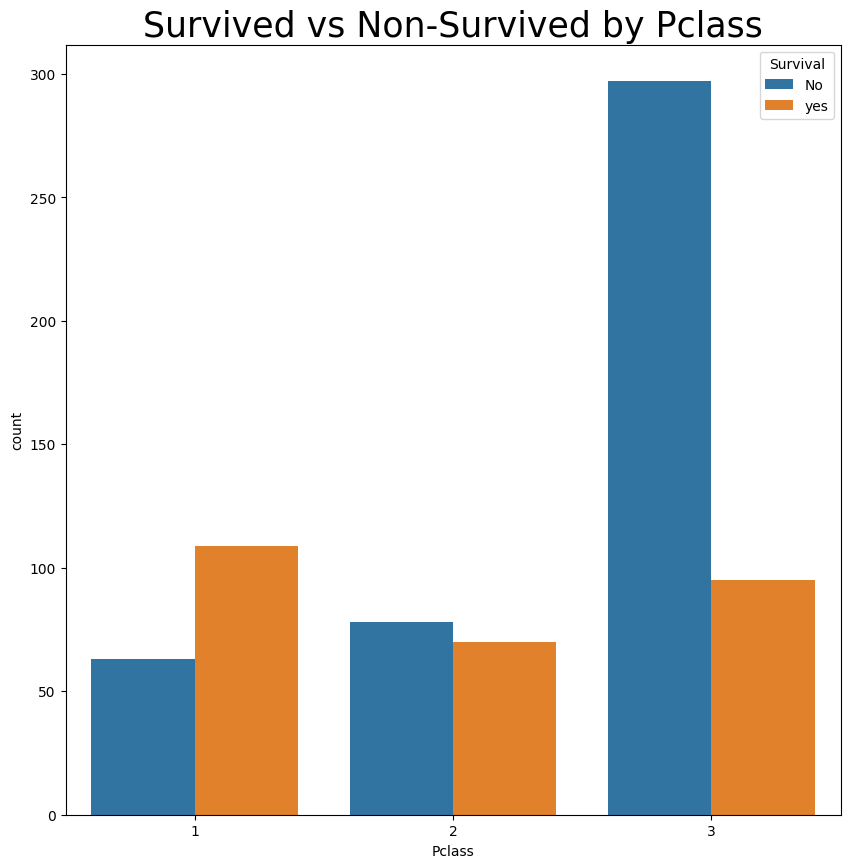

In [19]:
# Now check how many passengers (not)survived for each passenger's class
visualize_data('Pclass') 
print_survived_data_by_feature(strat_train_set,'Pclass')



Number of Survived passenger by Male :
Male
0.0    186
1.0     88
Name: Male, dtype: int64


Number of Death passenger by Male :
Male
0.0     64
1.0    374
Name: Male, dtype: int64


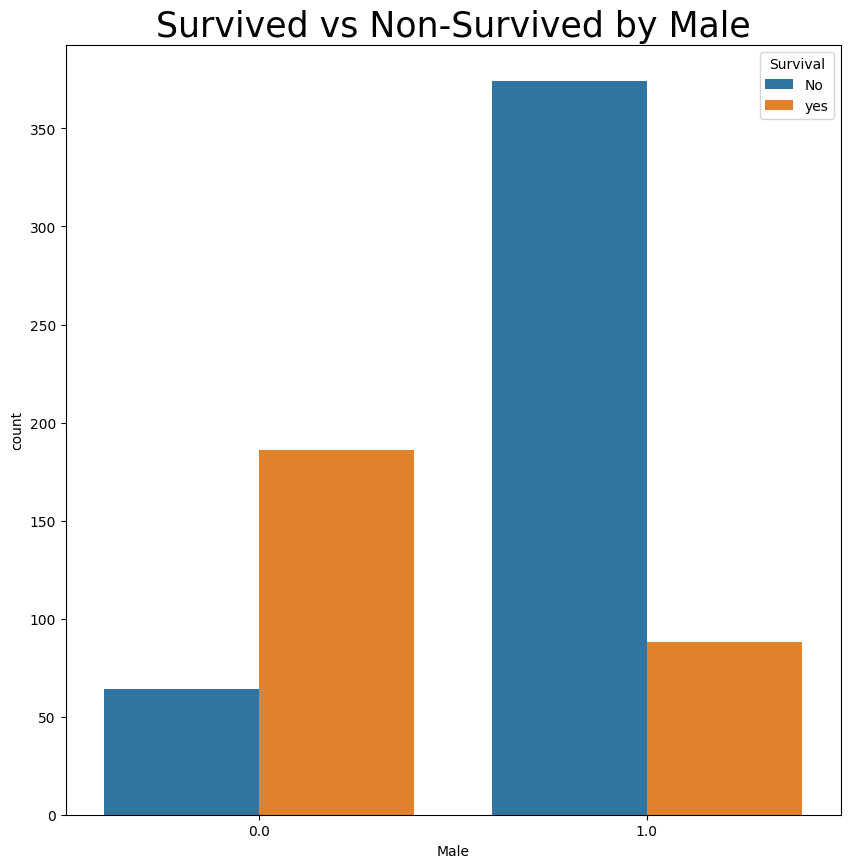

In [21]:
# Now check how many passengers (not)survived based on passenger's gender
visualize_data('Male')
print_survived_data_by_feature(strat_train_set,'Male')



Number of Survived passenger by Female :
Female
0.0     88
1.0    186
Name: Female, dtype: int64


Number of Death passenger by Female :
Female
0.0    374
1.0     64
Name: Female, dtype: int64


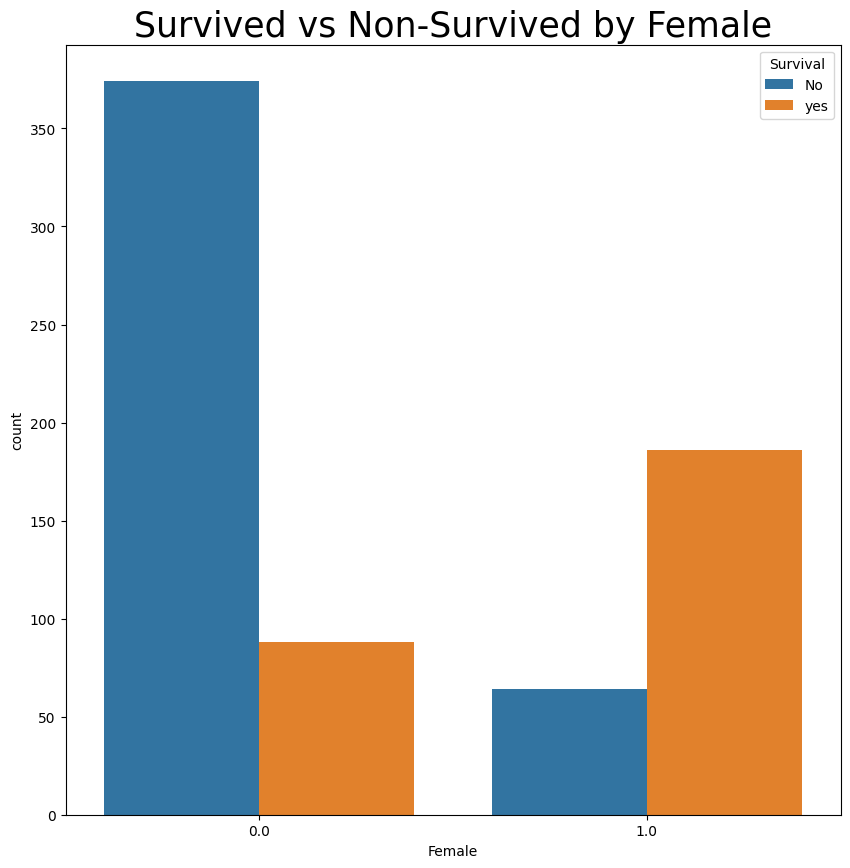

In [22]:
# Now check how many passengers (not)survived based on passenger's gender
visualize_data('Female')
print_survived_data_by_feature(strat_train_set,'Female')



Number of Survived passenger by SibSp :
SibSp
0    164
1     92
2     12
3      3
4      3
Name: SibSp, dtype: int64


Number of Death passenger by SibSp :
SibSp
0    325
1     74
2      9
3      9
4     12
5      3
8      6
Name: SibSp, dtype: int64


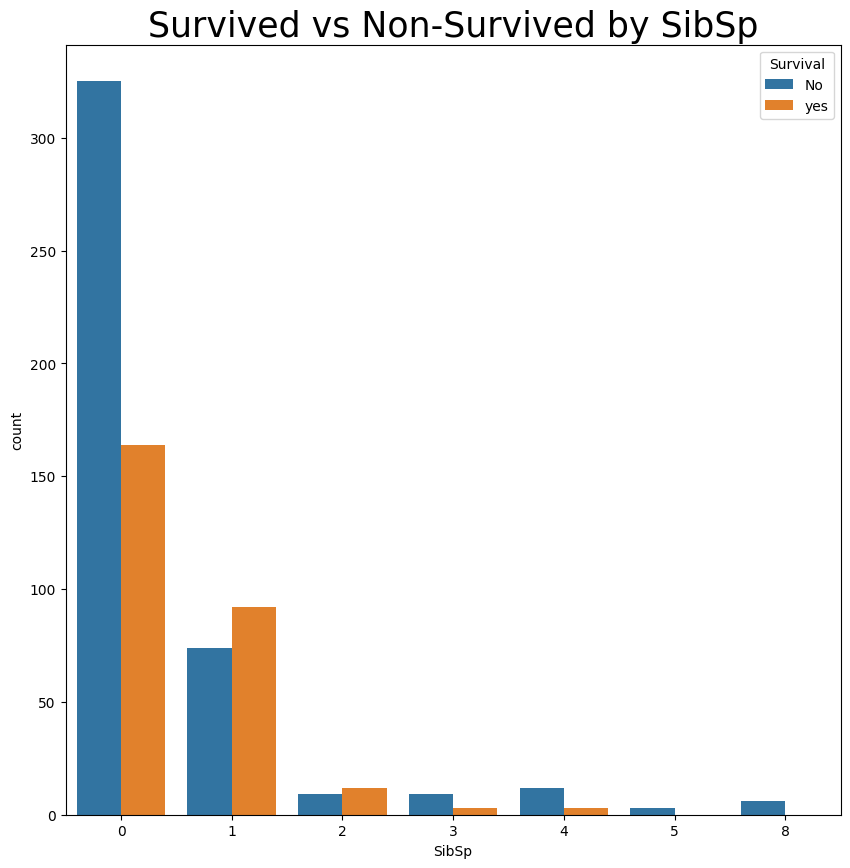

In [23]:
# Now check how many passengers (not)survived based on no of siblings/spouses the passenger had
visualize_data('SibSp')
print_survived_data_by_feature(strat_train_set,'SibSp')



Number of Survived passenger by Parch :
Parch
0    186
1     52
2     33
3      2
5      1
Name: Parch, dtype: int64


Number of Death passenger by Parch :
Parch
0    352
1     44
2     32
3      2
4      4
5      3
6      1
Name: Parch, dtype: int64


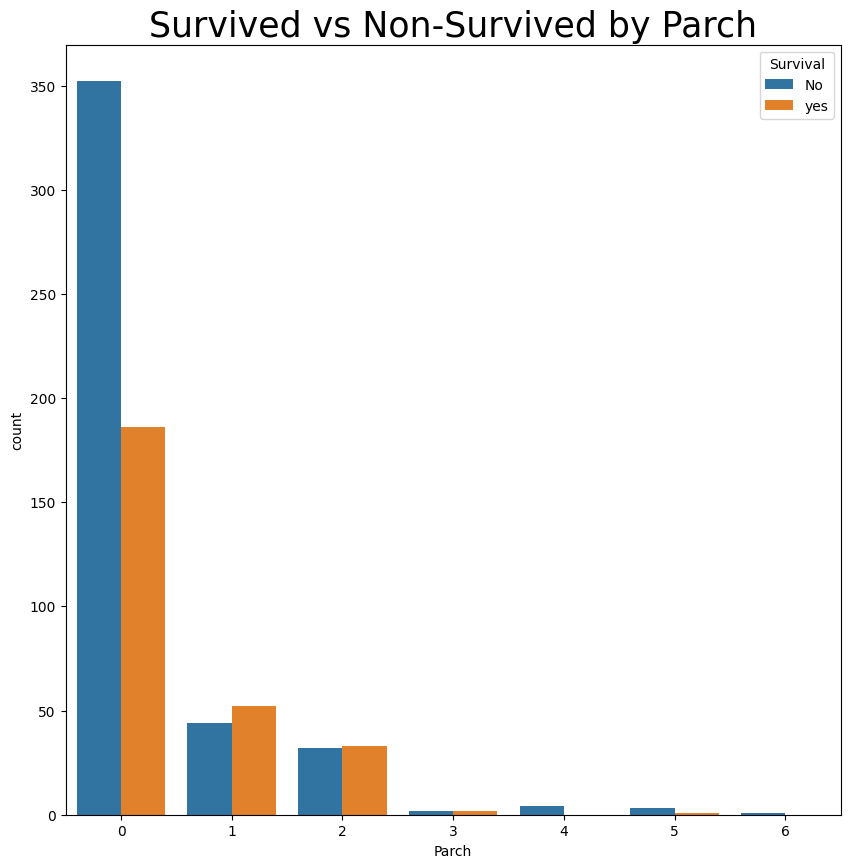

In [24]:
# Now, check how many passengers (not)survived based on number of parants/children the passenger had
visualize_data('Parch')
print_survived_data_by_feature(strat_train_set,'Parch')



Number of Survived passenger by Q :
Q
0.0    100
1.0    174
Name: Q, dtype: int64


Number of Death passenger by Q :
Q
0.0    101
1.0    337
Name: Q, dtype: int64


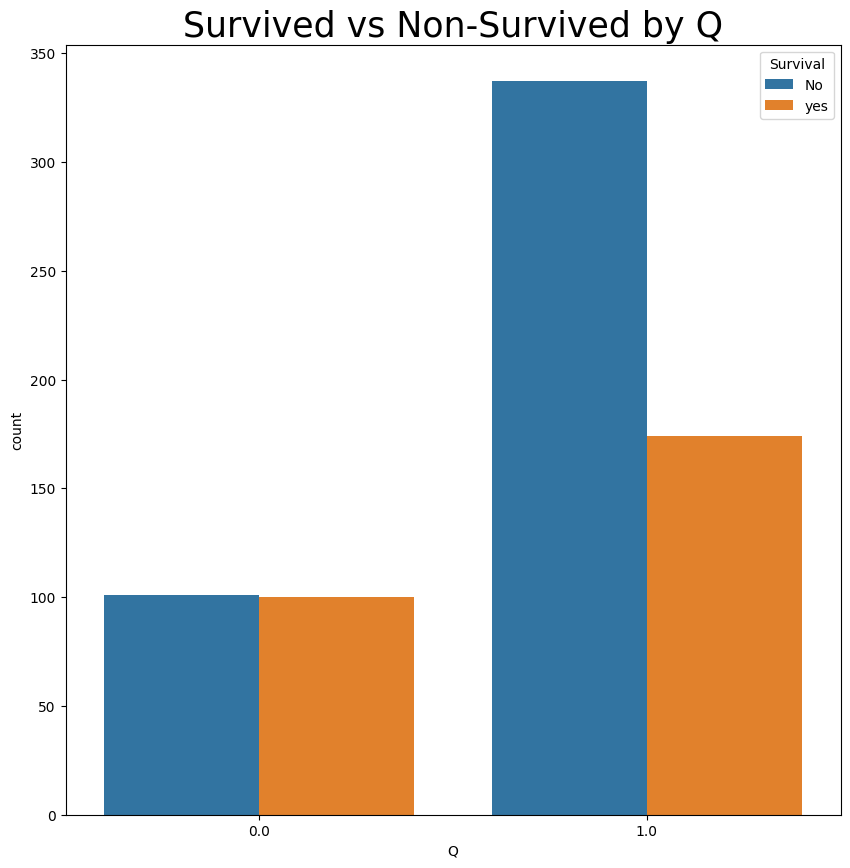

In [25]:
# Now, check how many passengers (not)survived based on embarked Port of the passenger
visualize_data('Q')
print_survived_data_by_feature(strat_train_set,'Q')



Number of Survived passenger by C :
C
0.0    202
1.0     72
Name: C, dtype: int64


Number of Death passenger by C :
C
0.0    378
1.0     60
Name: C, dtype: int64


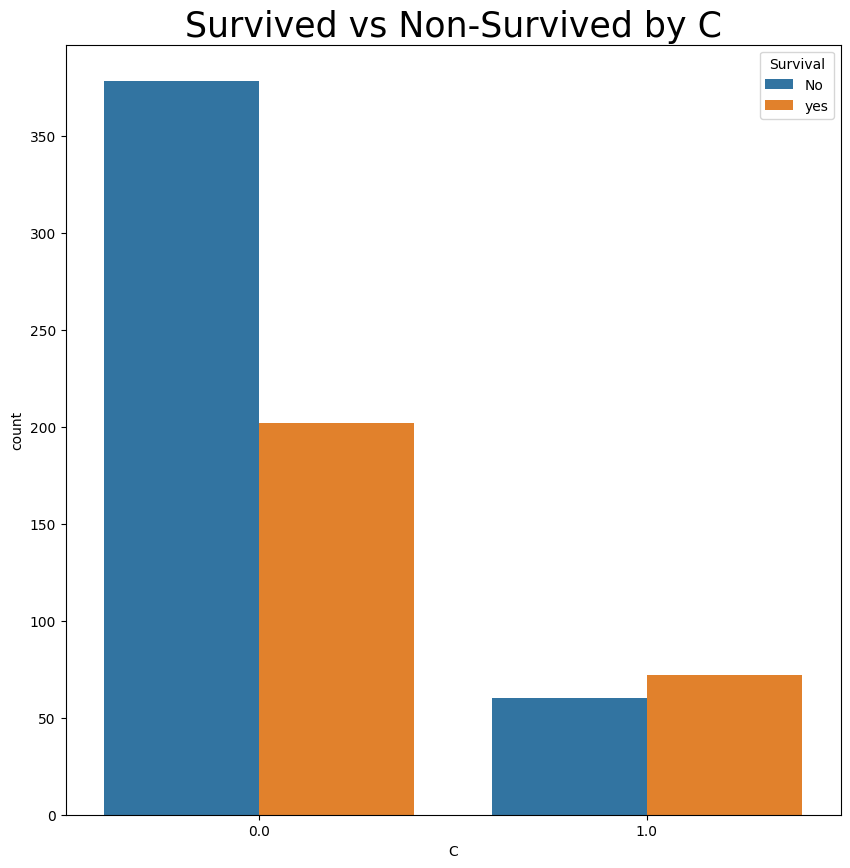

In [26]:
visualize_data('C')
print_survived_data_by_feature(strat_train_set,'C')



Number of Survived passenger by S :
S
0.0    248
1.0     26
Name: S, dtype: int64


Number of Death passenger by S :
S
0.0    397
1.0     41
Name: S, dtype: int64


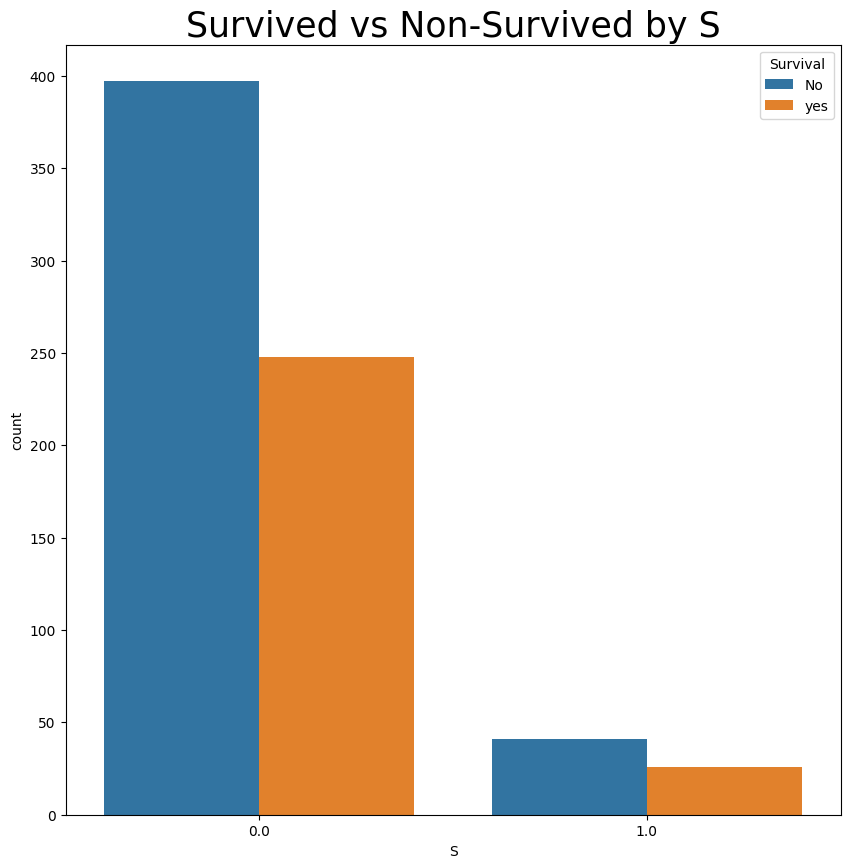

In [27]:
visualize_data('S')
print_survived_data_by_feature(strat_train_set,'S')

In [35]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [17]:
x_data

array([[-0.28086186,  0.82789342, -0.6073575 , ...,  0.63152294,
         1.35941164, -1.35941164],
       [-1.57346423,  0.82789342, -1.24118191, ..., -1.58347376,
         1.35941164, -1.35941164],
       [ 0.79311044,  0.82789342,  0.        , ...,  0.63152294,
        -0.73561236,  0.73561236],
       ...,
       [ 0.78927482, -0.37019624, -0.4489014 , ...,  0.63152294,
        -0.73561236,  0.73561236],
       [ 0.54379544, -1.56828591,  1.76948402, ..., -1.58347376,
         1.35941164, -1.35941164],
       [-0.25017693,  0.82789342,  0.        , ...,  0.63152294,
        -0.73561236,  0.73561236]])

In [29]:
#prepare the data
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
all_features = strat_train_set.drop("Survived",axis=1)
target_feature = strat_train_set["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,target_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((498, 11), (214, 11), (498,), (214,))

In [28]:
from sklearn.metrics import accuracy_score  #for accuracy_score

# this fn is used to apply a model which will be passed as parameter and return the accuracy using that model
def apply_model(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    prediction=model.predict(xtest)
    acc = round(accuracy_score(prediction,ytest)*100,2)
    return acc

In [30]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
logireg_acc=apply_model(LogisticRegression(),X_train,X_test,y_train,y_test)
print('The accuracy of the Logistic Regression is', logireg_acc)

The accuracy of the Logistic Regression is 74.3


e:\pythone\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree_model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1)
dtree_acc = apply_model(dtree_model,X_train,X_test,y_train,y_test)


print('The accuracy of the DecisionTree Classifier is', dtree_acc)

The accuracy of the DecisionTree Classifier is 78.5


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a LogisticRegression classifier
logistic_clf = LogisticRegression()

# Define the parameter grid for Logistic Regression
logistic_param_grid = [
    {"penalty": ['l1', 'l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100]}
]

# Create a GridSearchCV object for Logistic Regression
logistic_grid_search = GridSearchCV(logistic_clf, logistic_param_grid, cv=3, scoring="accuracy", return_train_score=True)

# Fit the Logistic Regression model to your data
logistic_grid_search.fit(x_data, y_data)

e:\pythone\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "e:\pythone\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\pythone\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\pythone\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
     

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2']}],
             return_train_score=True, scoring='accuracy')

#Apply RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth":[None, 5, 10], "min_samples_split":[2,3,4]}
]

grid_serach = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_serach.fit(x_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [44]:
final_clf = logistic_grid_search.best_estimator_
final_clf

LogisticRegression(C=10)

In [46]:
strat_test_set = pipeline.fit_transform(strat_test_set)


0
1


In [47]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [48]:
final_clf.score(X_data_test, y_data_test)

0.7877094972067039

In [49]:
final_data = pipeline.fit_transform(titanic_data)

0
1


In [50]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [52]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
x_data_final = scaler.fit_transform(X_final)
y_data_final = y.to_numpy()

In [53]:
print(y_data_final)

[1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 

In [54]:
final_clf = logistic_grid_search.best_estimator_
final_clf

LogisticRegression(C=10)

In [64]:
titanic_test_data = pd.read_csv("titanic/test.csv")

In [65]:
final_test_data = pipeline.fit_transform(titanic_test_data)

0
1


In [66]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [67]:
from sklearn.preprocessing import StandardScaler

X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [68]:
predistions = final_clf.predict(X_data_final_test)

In [69]:
predistions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [86]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predistions
final_df.to_csv("LogisticRegression_predictions.csv", index=False)

#Import pickle for export Model 

In [55]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(final_clf, file)

#Test Load For Work it

In [57]:
import pickle
loaded_model = pickle.load(open("model.pkl", "rb"))
loaded_model

LogisticRegression(C=10)

#Survived Result 

In [93]:
import numpy as np

# [892 ,3 ,34 ,0 ,0 ,7 ,0 ,1 ,0 ,0,1]
data = [898 ,3 ,30 ,0 ,0 ,7.6292,0 ,0 ,1 ,1,0]  # Use a Python list
input_data = np.array(data)

print(input_data)

prediction = loaded_model.predict([input_data])
result = prediction[0]
print(prediction)
if result==0 :
    print('die')
else : print('Survived')

[898.       3.      30.       0.       0.       7.6292   0.       0.
   1.       1.       0.    ]
[1]
Survived
